In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from nn_functions.NODE import training, predict
from data.data_functions.get_data import fren_data, cart_data
from data.data_functions.utils import array_to_tensor
from plot_functions.trajectory_plot import plot_states_and_controls, simulate

In [2]:
from torchdiffeq import odeint_adjoint as odeint
from nn_functions.NODE import system

In [3]:
index_0 = 10195
sim = False
l_chunk = 1100

# index_0 = 0
# sim = True
# l_chunk = 1250

downsample = 1

In [4]:
whole_data = fren_data(index_0=index_0,sim=sim,l_chunk=l_chunk,downsample=downsample)

Initialization: collecting the ros_bag and converting to Frenet's coordinates frame


Initialization: 1120datapoints [01:29, 12.49datapoints/s]                  

Init done: 1.0min32


In [ ]:
lr=1e-3
epochs=3
hidden_size1=20
hidden_size2=10
method='rk4'
l_batch_train=10
noise=False

In [ ]:
loss,val_loss,clsys,train_fren,ode_ctl = training(whole_data,lr=lr,epochs=epochs,hidden_size1=hidden_size1,hidden_size2=hidden_size2,method=method,l_batch=l_batch_train,sim=sim,noise=noise)

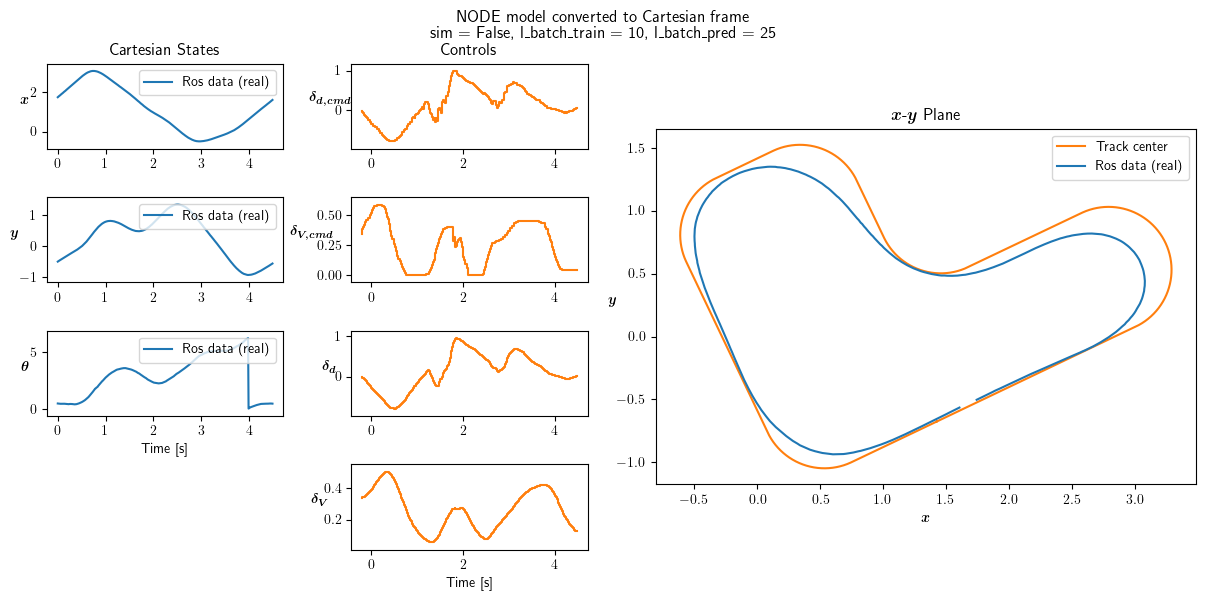

In [ ]:
whole_data_cart = array_to_tensor(cart_data(sim,whole_data))
l_batch_pred1 = 25
t = whole_data[-1]
comm_delay_margin = torch.nonzero(t==0).squeeze()
if comm_delay_margin == []:
    comm_delay_margin = 0
data_cart = whole_data_cart[:3,comm_delay_margin:]
plot_states_and_controls(data_cart,data_cart,data_cart,whole_data[3:5],t,sim,l_batch_train,l_batch_pred1,plot_nn=False,ode_ctl=ode_ctl,end=450)

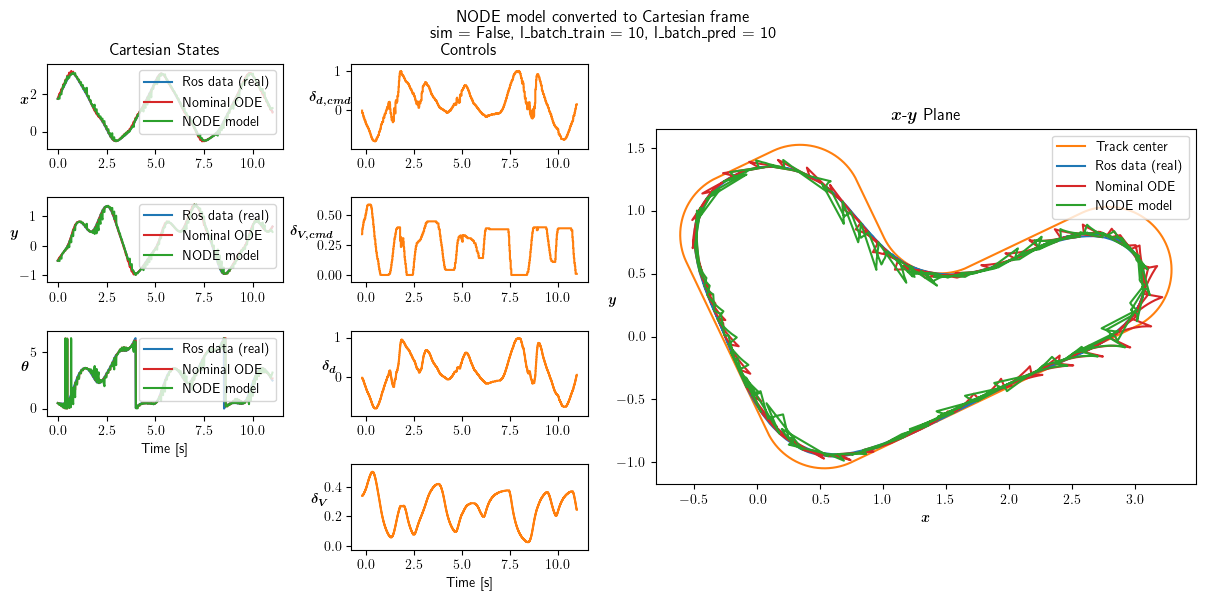

In [28]:
l_batch_pred2 = 10
node_cart2,nom_cart2,train_cart2 = predict(clsys, train_fren, method, sim=sim, l_batch=l_batch_pred2)
plot_states_and_controls(train_cart2,node_cart2,nom_cart2,train_fren[3:5],train_fren[-1],sim,l_batch_train,l_batch_pred2,ode_ctl=ode_ctl)

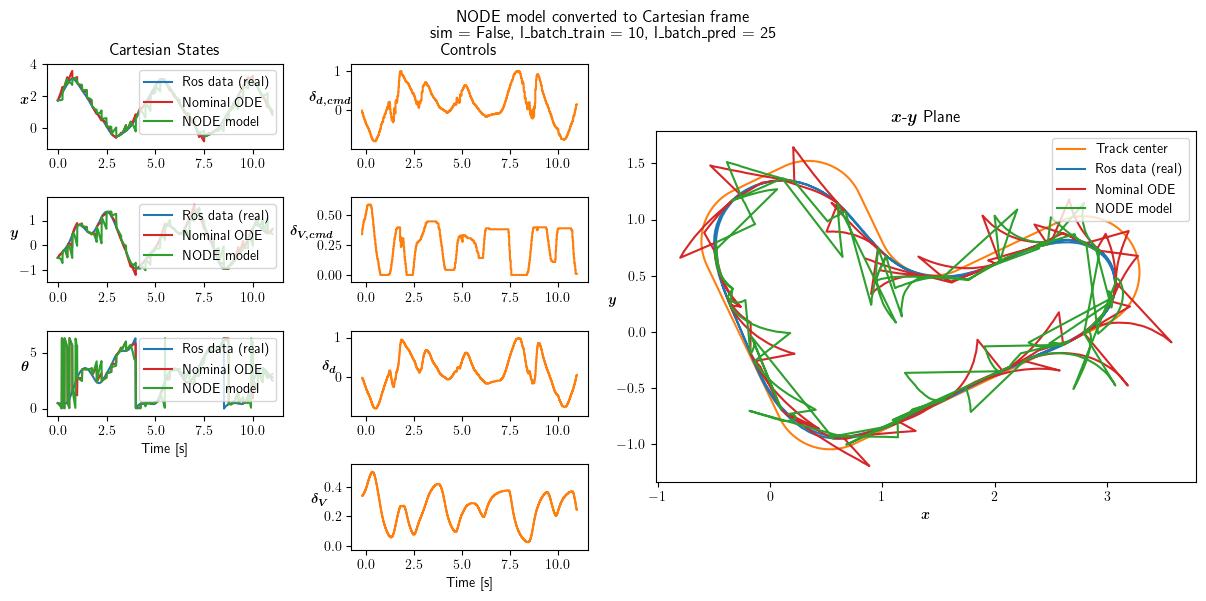

In [29]:
l_batch_pred1 = 25
node_cart1,nom_cart1,train_cart1 = predict(clsys, train_fren, method, sim=sim, l_batch=l_batch_pred1)
plot_states_and_controls(train_cart1,node_cart1,nom_cart1,train_fren[3:5],train_fren[-1],sim,l_batch_train,l_batch_pred1,ode_ctl=ode_ctl)

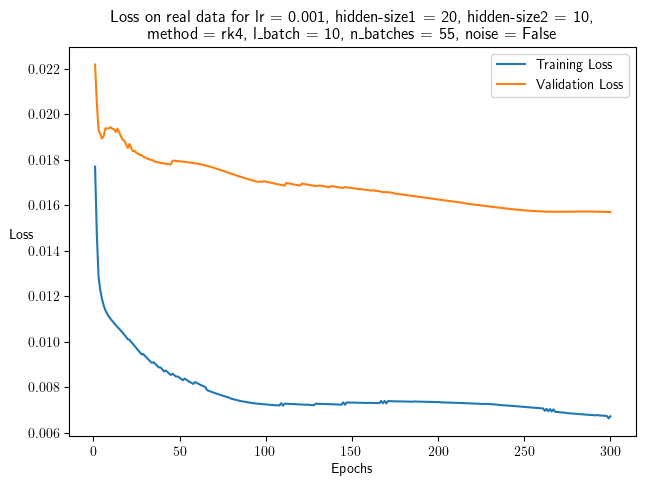

In [ ]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

if sim:
    text = 'in simulation'
else:
    text = 'on real data'
n_batches = int(len(train_fren[0])/l_batch_train)

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
epochs = np.linspace(1,len(loss),len(loss))

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss',rotation=0)
ax.set_title('Loss {} for: lr = {}, hidden-size1 = {}, hidden-size2 = {},\n method = {}, l_batch = {}, n_batches = {}, downsample = {}, noise = {}'
             .format(text,lr,hidden_size1,hidden_size2,method,l_batch_train,n_batches,downsample,noise),weight='bold')
ax.plot(epochs,loss, label='Training Loss')
if 'val_loss' in locals():
    ax.plot(epochs,val_loss, label='Validation Loss')
ax.legend(loc="upper right")
fig.tight_layout(pad=.5)

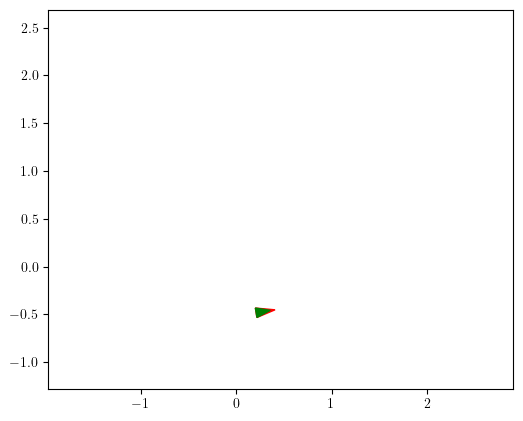

In [ ]:
from plot_functions.trajectory_plot import simulate
simulate(train_cart2, train_fren[3:5], save=False)

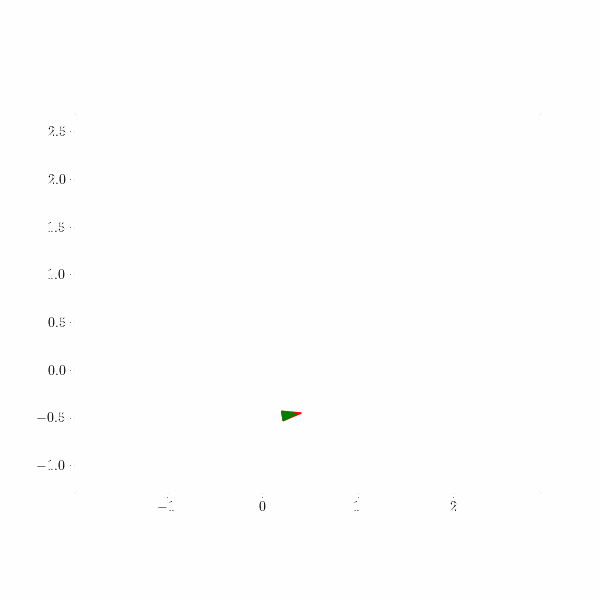

<PIL.Image.Image image mode=RGB size=600x600 at 0x1882AF83E90>


In [ ]:
from PIL import Image, ImageSequence
import IPython.display as display

# Open the GIF file
gif_path = 'animation1700664681.6143072.gif'
gif = Image.open(gif_path)

# Convert to RGB mode
gif = gif.convert('RGB')

# Display each frame of the GIF
for frame in ImageSequence.Iterator(gif):
    display.display(frame)
    print(frame)